## Importing the Libraries

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [6]:
# Load the dataset
data = pd.read_csv(r'E:\WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Preprocessing

In [8]:
print("\nData Info:")
data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nul

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
print("Data Shape:", data.shape)

Data Shape: (7043, 21)


## Checking For Null Values

In [11]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Hence there are no missing values

### 1. **Dropping Irrelevant Columns**

In [12]:
# Dropping customerID as it is not useful for prediction
data.drop('customerID', axis=1, inplace=True)

In [13]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
# Output: Confirming the drop by showing new shape
print("Data Shape after dropping customerID:", data.shape)

Data Shape after dropping customerID: (7043, 20)


- **Reason:** `customerID` is not useful for prediction.
- **Output Explanation:** Shows updated dataset shape after removing the column.

### 2. **Handling Data Type Inconsistencies**

In [15]:
# Converting 'TotalCharges' from object to numeric. If conversion fails, replace errors with NaN.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Checking how many values were coerced to NaN
print("\nMissing values in TotalCharges after conversion:", data['TotalCharges'].isnull().sum())

# Filling missing values with the median of the 'TotalCharges' column.
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


Missing values in TotalCharges after conversion: 11


In [16]:
# Output: Confirm no missing values remain
print("\nMissing values in TotalCharges after filling:", data['TotalCharges'].isnull().sum())


Missing values in TotalCharges after filling: 0


- **Reason:** Ensures the column is numeric for analysis and handles missing values without bias.
- **Output Explanation:**
  - Displays missing values count before and after filling with the median.

### 3. **Encoding Categorical Variables**

In [17]:
# Label Encoding: Converts categorical columns into numeric form.
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

In [18]:
# Output: Confirming encoding by checking data types
print(data.dtypes)  # Expected: All object columns converted to int64

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object


### 4. **Feature Scaling**

In [19]:
# Standardizing the features to have zero mean and unit variance.
scaler = StandardScaler()
X = data.drop('Churn', axis=1)
y = data['Churn']
X_scaled = scaler.fit_transform(X)

In [20]:
# Output: Checking the mean and std deviation after scaling
print("\nMean after scaling:", np.mean(X_scaled))  
print("Standard deviation after scaling:", np.std(X_scaled))


Mean after scaling: -2.2168453348964767e-18
Standard deviation after scaling: 1.0


In [21]:
# Output: Checking the mean and std deviation after scaling
print("\nMean after scaling:", round(np.mean(X_scaled), 2))  
print("Standard deviation after scaling:", round(np.std(X_scaled), 2)) 


Mean after scaling: -0.0
Standard deviation after scaling: 1.0


In [22]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [23]:
# 5. Splitting the Dataset
# Splitting the dataset into training and testing sets (80-20 split).
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
# Output: Shapes of the training and testing datasets
print("\nX_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


X_train shape: (5634, 19)
X_test shape: (1409, 19)
y_train distribution:
 Churn
0    4138
1    1496
Name: count, dtype: int64
y_test distribution:
 Churn
0    1036
1     373
Name: count, dtype: int64


### Conclusion
#### ✅ Data Preprocessing Completed:

#### Removed irrelevant columns:
   - Dropped customerID as it doesn’t contribute to predictions.

#### Handled missing values:
- TotalCharges was converted to numeric, and missing values were filled with the median.

#### Encoded categorical variables:
- Used LabelEncoder to convert all categorical variables into numerical format.

#### Feature scaling:
 -  Applied StandardScaler for zero mean and unit variance scaling.

#### Data splitting:
   - Split into training and test sets (80-20 split).

# Univariate and Bivariate Analysis for Telco Customer Churn Dataset

## 📈 **Univariate Analysis**
### 1. Distribution of Categorical Features

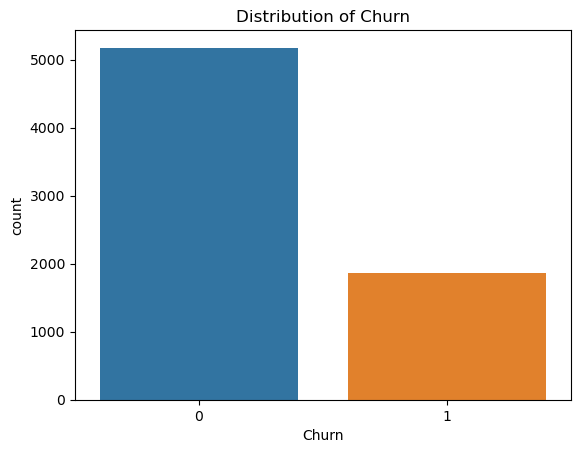

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Distribution of 'Churn'
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

# For all categorical columns
data.select_dtypes(include='object').columns
for col in data.select_dtypes(include='object').columns:
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


**Output:** Count plots showing distribution for each categorical variable.

### 2. Distribution of Numerical Features

#### Example: Distribution of 'MonthlyCharges'

C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


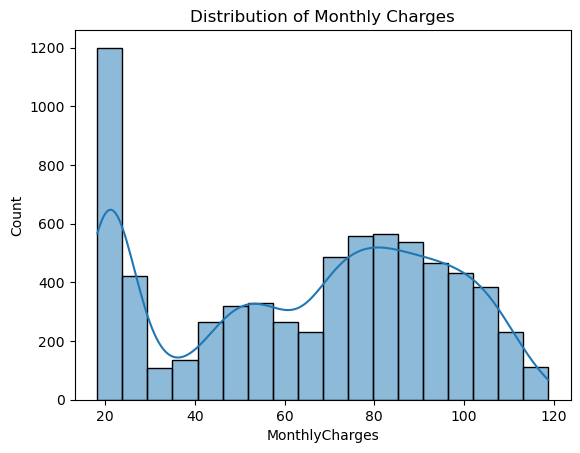

In [30]:
sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


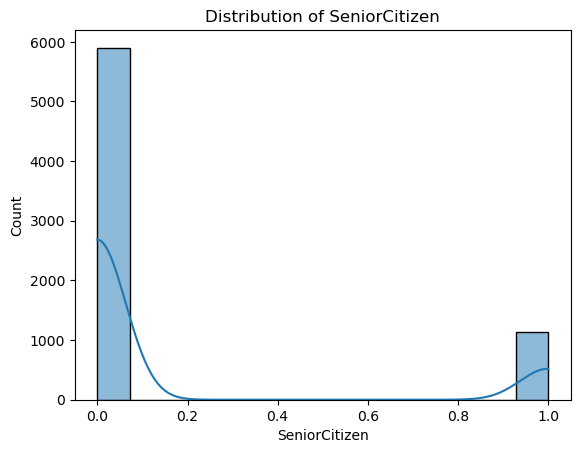

C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


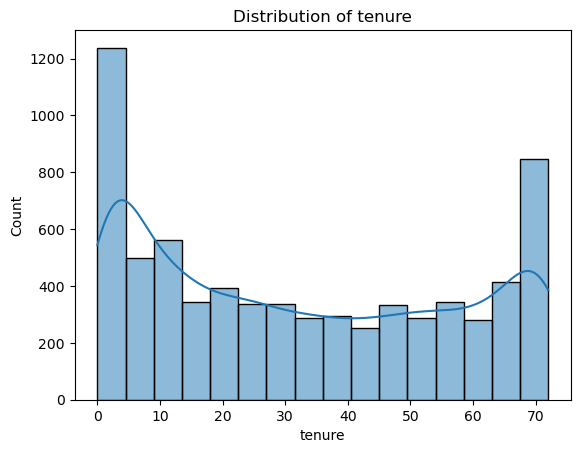

C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


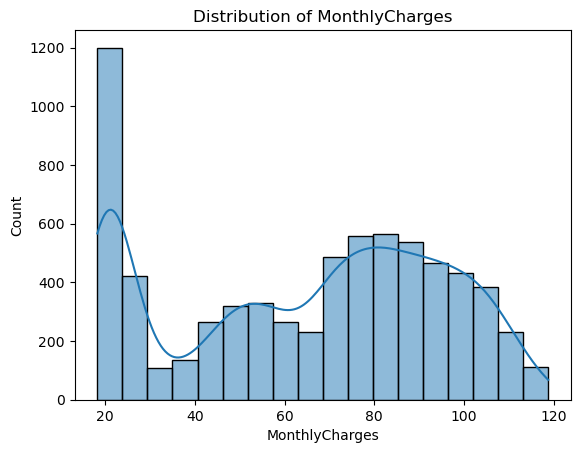

C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


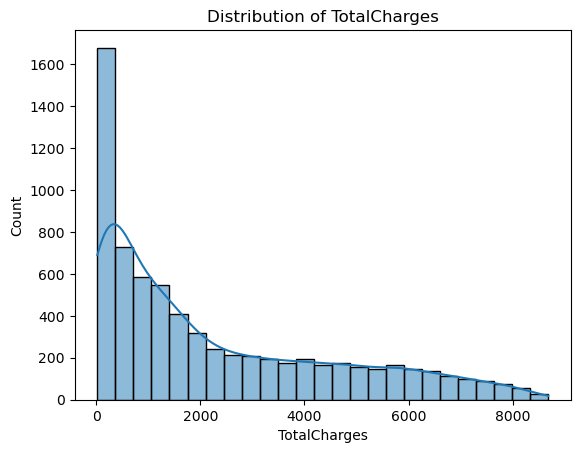

In [31]:
# For all numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Output:** Histogram plots for numerical variables to check skewness and outliers.

## 🔗 **Bivariate Analysis**

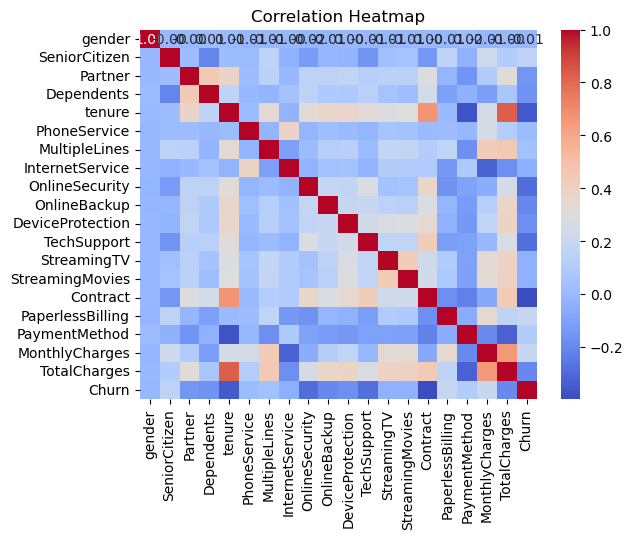

In [37]:
### 2. Correlation Between Numerical Features

# Correlation heatmap
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Output:** Heatmap showing correlation between numerical variables.

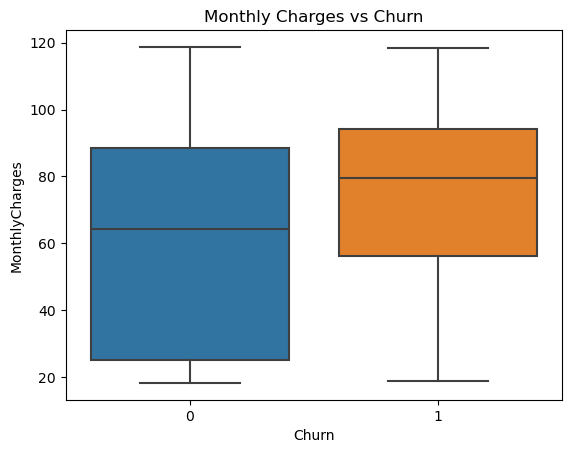

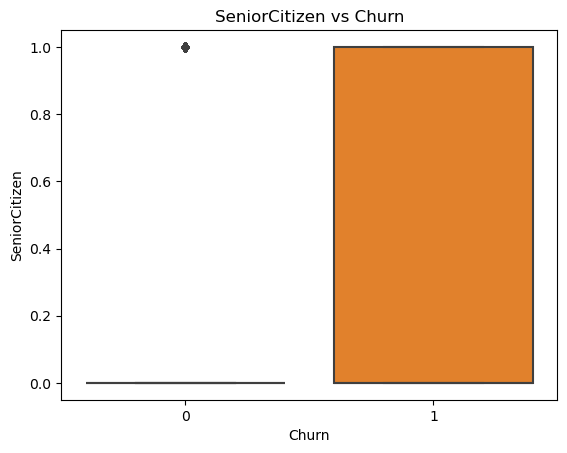

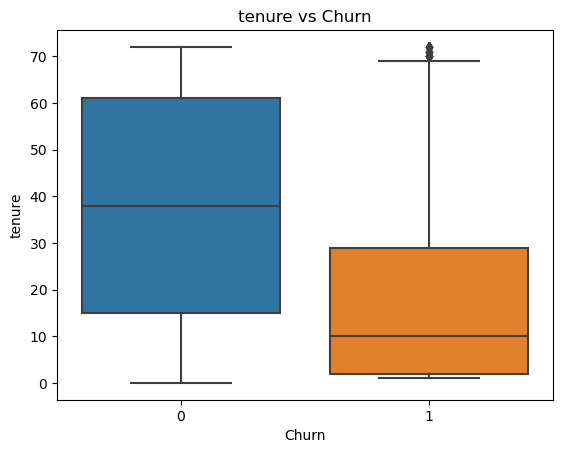

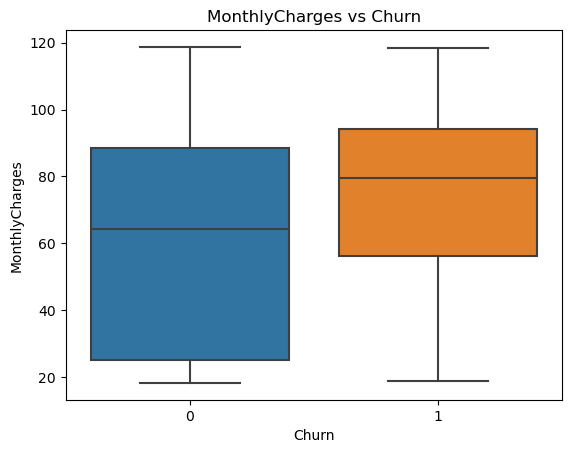

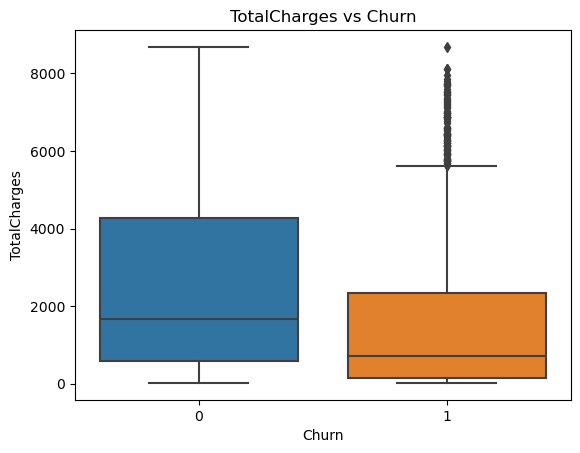

In [39]:
### 3. Numerical vs Categorical (Boxplots)

# Example: MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs Churn')
plt.show()

# For all numerical columns vs 'Churn'
for col in numerical_cols:
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f'{col} vs Churn')
    plt.show()

**Output:** Boxplots showing distribution of numerical features across churn categories.
